In [1]:
import sys
import sys
sys.path
sys.path.append('../')

import numpy as np
from diamonds import experiments, normal_equation

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
scoring = {
    	'Negative MSE': 'neg_mean_squared_error',
    	'Negative MAE': 'neg_mean_absolute_error',
    	'R2': 'r2'
	}

val_size = .15
params = {}

/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Discution 1
  - Using the SKlearn SGDregressor with basic params we are now comparing the results.
  - Kept only the best results from the first experiment to run the GridSearch for the parameters
  - The Log(Y) kept the algorithm more robust reducing the errors mean value
  - The Scale kept the algorithm more robust reducing the errors mean value
  - The syntetic features wherever they appeards reduces the standard deviation from the MAE/MSE and RSME


In [2]:
regr = experiments.get_sklearn_sgd(params)
regr

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=True, warm_start=False)

## Adding syntect features ['volume', 'ratio_xy']

In [3]:
X = experiments.load_train_data()
folds, (X_train, X_test, y_train, y_test) = experiments.gen_splits(X, scale=True, 
                                                             exclude_features=['ratio_xz'])

### Log(price)

In [4]:
experiments.kfold_evaluate(regr, folds, scoring, log_y=True)

Evaluating 0
Evaluating 1
Evaluating 2
Evaluating 3
Evaluating 4
RMSE: 	 1623.5299 +/- 98.0607
MSE:  	 2645465.1322 +/- 314672.4479
MAE:  	 719.4283 +/- 23.8322
R2:   	 0.8138 +/- 0.0222


/root/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Adding syntect features ['volume', 'ratio_xz']

In [5]:
X = experiments.load_train_data()
folds, (X_train, X_test, y_train, y_test) = experiments.gen_splits(X, scale=True, 
                                                             exclude_features=['ratio_xy'])

### Log(price)

In [6]:
experiments.kfold_evaluate(regr, folds, scoring, log_y=True)

Evaluating 0
Evaluating 1
Evaluating 2
Evaluating 3
Evaluating 4
RMSE: 	 1588.3106 +/- 101.2143
MSE:  	 2532974.9834 +/- 336302.1876
MAE:  	 705.9682 +/- 29.9954
R2:   	 0.8218 +/- 0.0224


/root/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Adding syntect features ['volume', 'ratio_xy', 'ratio_xz']

In [7]:
X = experiments.load_train_data()
folds, (X_train, X_test, y_train, y_test) = experiments.gen_splits(X, scale=True, 
                                                             exclude_features=[])

### Log(price)

In [8]:
experiments.kfold_evaluate(regr, folds, scoring, log_y=True)

Evaluating 0
Evaluating 1
Evaluating 2
Evaluating 3
Evaluating 4
RMSE: 	 1589.3804 +/- 111.7284
MSE:  	 2538613.2083 +/- 366494.7774
MAE:  	 710.8763 +/- 31.5879
R2:   	 0.8214 +/- 0.0244


/root/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


----

## Discution 2
  - The results doesn't appear to have an statistical difference between then, since the mean and std deviation are practically the same. Although the result with features included has a better R2. 
  - The SGD goes almost to the same minimal as the normal equation results.
  - Whe are now running the GridSearch CV for the SGD to look for better parameters and will be using the last dataset above. 


In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate':['invscaling', 'optimal', 'constant'],
    'eta0': [0.1, 0.05, 0.01], # since 0.01 had a good result in the previous results 
    'penalty': ['l2', 'l1', None], # Those penalties are easier to implement if needed
    'loss': ['squared_loss'], # Since we are running the MSE loss function for the Custom Implementing
    'max_iter':[5000] # Fixed the number of iterations to avoid the long time executions
}

scoring = {
        '-MSE': 'neg_mean_squared_error',
        '-MAE': 'neg_mean_absolute_error',
        'R2': 'r2'
    }

# We are using R2 to refit because it gave a better view of the results above when compared with the MSE and MAE
regr = GridSearchCV(regr, params, cv=5, scoring=scoring, refit='R2', n_jobs=-1, verbose=True)
regr.fit(X_train, np.log(y_train))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2', 'l1', None], 'loss': ['squared_loss'], 'max_iter': [5000], 'learning_rate': ['invscaling', 'optimal', 'constant'], 'eta0': [0.1, 0.05, 0.01]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score='warn',
       scoring={'-MAE': 'neg_mean_absolute_error', 'R2': 'r2', '-MSE': 'neg_mean_squared_error'},
       verbose=True)

In [10]:
regr.best_estimator_

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=5000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=False, warm_start=False)

In [11]:
regr.best_params_

{'eta0': 0.01,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'max_iter': 5000,
 'penalty': None}

In [12]:
regr.cv_results_.keys()

dict_keys(['param_eta0', 'split0_train_-MSE', 'split4_train_-MAE', 'mean_train_-MSE', 'split2_test_-MAE', 'rank_test_-MSE', 'split0_test_-MSE', 'std_train_R2', 'mean_test_-MSE', 'std_score_time', 'param_loss', 'split2_test_R2', 'param_penalty', 'rank_test_R2', 'split3_train_-MAE', 'split4_train_R2', 'split2_train_R2', 'split3_test_-MAE', 'mean_test_-MAE', 'param_learning_rate', 'split4_test_-MAE', 'std_test_-MSE', 'split0_test_-MAE', 'split2_train_-MSE', 'split1_test_R2', 'split1_test_-MAE', 'mean_test_R2', 'split2_train_-MAE', 'split2_test_-MSE', 'rank_test_-MAE', 'split0_test_R2', 'params', 'std_test_R2', 'mean_train_-MAE', 'std_train_-MSE', 'split1_train_R2', 'mean_train_R2', 'param_max_iter', 'split3_train_-MSE', 'split3_train_R2', 'std_test_-MAE', 'mean_score_time', 'split3_test_R2', 'std_train_-MAE', 'split0_train_R2', 'split4_test_-MSE', 'mean_fit_time', 'std_fit_time', 'split1_train_-MAE', 'split3_test_-MSE', 'split1_test_-MSE', 'split1_train_-MSE', 'split4_train_-MSE', 'split4

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

columns = [
'param_learning_rate',
'param_max_iter',
'param_loss',
'param_eta0',
'param_penalty',
'rank_test_-MSE',
'rank_test_-MAE',
'rank_test_R2',
'std_test_-MSE',
'std_test_-MAE',
'std_test_R2',
'mean_test_-MSE',
'mean_test_-MAE',
'mean_test_R2', 
'mean_fit_time']

results = pd.DataFrame(regr.cv_results_)
top10 = results[columns].sort_values(by=['rank_test_R2', 'mean_test_R2']).head(10).copy()
top10.sort_values(by=['rank_test_R2', 'mean_test_R2'])
top10.set_index('rank_test_R2', inplace=True, drop=True)
top10

,param_learning_rate,param_max_iter,param_loss,param_eta0,param_penalty,rank_test_-MSE,rank_test_-MAE,std_test_-MSE,std_test_-MAE,std_test_R2,mean_test_-MSE,mean_test_-MAE,mean_test_R2,mean_fit_time
rank_test_R2,,,,,,,,,,,,,,
1,constant,5000,squared_loss,0.01,None,1,1,0.000448,0.001559,0.000500,-0.013497,-0.091654,0.986134,10.943297
2,invscaling,5000,squared_loss,0.1,None,2,2,0.000512,0.001595,0.000577,-0.013540,-0.091769,0.986089,23.961097
3,invscaling,5000,squared_loss,0.05,None,3,3,0.000504,0.001452,0.000572,-0.013928,-0.092772,0.985690,21.347103
4,constant,5000,squared_loss,0.05,None,4,8,0.000703,0.002083,0.000771,-0.014965,-0.096874,0.984625,12.581060
5,invscaling,5000,squared_loss,0.01,None,5,5,0.000519,0.001465,0.000594,-0.015004,-0.096484,0.984585,20.943546
6,invscaling,5000,squared_loss,0.1,l1,6,6,0.000538,0.001570,0.000615,-0.015027,-0.096597,0.984561,31.900651
7,invscaling,5000,squared_loss,0.05,l1,7,4,0.000531,0.001396,0.000603,-0.015033,-0.096383,0.984555,28.259650
8,invscaling,5000,squared_loss,0.05,l2,8,7,0.000515,0.001427,0.000589,-0.015085,-0.096858,0.984501,22.078471
9,invscaling,5000,squared_loss,0.1,l2,9,9,0.000541,0.001595,0.000621,-0.015115,-0.096960,0.984470,23.298074


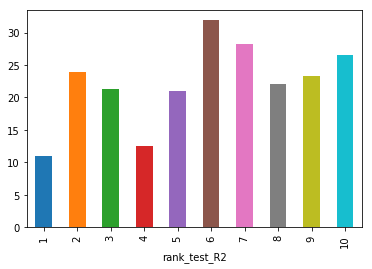

In [14]:
top10.mean_fit_time.plot.bar()

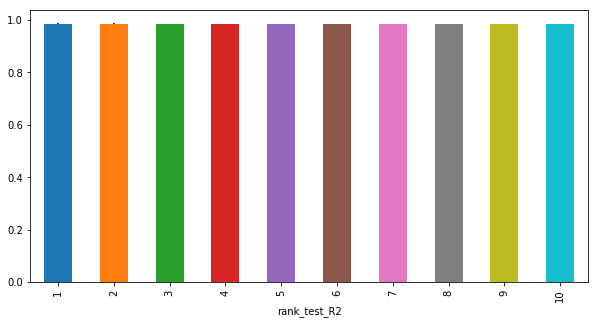

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
top10.mean_test_R2.plot.bar(yerr=top10.std_test_R2)

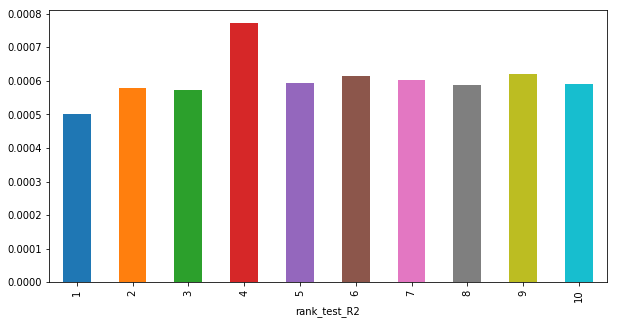

In [16]:
plt.figure(figsize=(10,5))
top10.std_test_R2.plot.bar()

In [17]:
top10

,param_learning_rate,param_max_iter,param_loss,param_eta0,param_penalty,rank_test_-MSE,rank_test_-MAE,std_test_-MSE,std_test_-MAE,std_test_R2,mean_test_-MSE,mean_test_-MAE,mean_test_R2,mean_fit_time
rank_test_R2,,,,,,,,,,,,,,
1,constant,5000,squared_loss,0.01,None,1,1,0.000448,0.001559,0.000500,-0.013497,-0.091654,0.986134,10.943297
2,invscaling,5000,squared_loss,0.1,None,2,2,0.000512,0.001595,0.000577,-0.013540,-0.091769,0.986089,23.961097
3,invscaling,5000,squared_loss,0.05,None,3,3,0.000504,0.001452,0.000572,-0.013928,-0.092772,0.985690,21.347103
4,constant,5000,squared_loss,0.05,None,4,8,0.000703,0.002083,0.000771,-0.014965,-0.096874,0.984625,12.581060
5,invscaling,5000,squared_loss,0.01,None,5,5,0.000519,0.001465,0.000594,-0.015004,-0.096484,0.984585,20.943546
6,invscaling,5000,squared_loss,0.1,l1,6,6,0.000538,0.001570,0.000615,-0.015027,-0.096597,0.984561,31.900651
7,invscaling,5000,squared_loss,0.05,l1,7,4,0.000531,0.001396,0.000603,-0.015033,-0.096383,0.984555,28.259650
8,invscaling,5000,squared_loss,0.05,l2,8,7,0.000515,0.001427,0.000589,-0.015085,-0.096858,0.984501,22.078471
9,invscaling,5000,squared_loss,0.1,l2,9,9,0.000541,0.001595,0.000621,-0.015115,-0.096960,0.984470,23.298074


## Refining the search
   - Given the above rank we are selecting the 3 top configurations and re-running the grid with more iterations

In [18]:
params = {}
regr = experiments.get_sklearn_sgd(params)
regr.verbose = False
params = {
    'learning_rate':['invscaling','constant'],
    'eta0': [0.1, 0.05, 0.01], # since 0.01 had a good result in the previous results 
    'penalty': [None], # Those penalties are easier to implement if needed
    'loss': ['squared_loss'], # Since we are running the MSE loss function for the Custom Implementing
    'max_iter':[100000] # Fixed the number of iterations to avoid the long time executions
}

scoring = {
        '-MSE': 'neg_mean_squared_error',
        '-MAE': 'neg_mean_absolute_error',
        'R2': 'r2'
    }

# We are using R2 to refit because it gave a better view of the results above when compared with the MSE and MAE
regr = GridSearchCV(regr, params, cv=5, scoring=scoring, refit='R2', n_jobs=-1, verbose=True)
regr.fit(X_train, np.log(y_train))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': [None], 'loss': ['squared_loss'], 'max_iter': [100000], 'learning_rate': ['invscaling', 'constant'], 'eta0': [0.1, 0.05, 0.01]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score='warn',
       scoring={'-MAE': 'neg_mean_absolute_error', 'R2': 'r2', '-MSE': 'neg_mean_squared_error'},
       verbose=True)

In [19]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

columns = [
'param_learning_rate',
'param_max_iter',
'param_loss',
'param_eta0',
'param_penalty',
'rank_test_-MSE',
'rank_test_-MAE',
'rank_test_R2',
'std_test_-MSE',
'std_test_-MAE',
'std_test_R2',
'mean_test_-MSE',
'mean_test_-MAE',
'mean_test_R2', 
'mean_fit_time']

results = pd.DataFrame(regr.cv_results_)
top10 = results[columns].sort_values(by=['rank_test_R2', 'mean_test_R2']).head(10).copy()
top10.sort_values(by=['rank_test_R2', 'mean_test_R2'])
top10.set_index('rank_test_R2', inplace=True, drop=True)
top10

,param_learning_rate,param_max_iter,param_loss,param_eta0,param_penalty,rank_test_-MSE,rank_test_-MAE,std_test_-MSE,std_test_-MAE,std_test_R2,mean_test_-MSE,mean_test_-MAE,mean_test_R2,mean_fit_time
rank_test_R2,,,,,,,,,,,,,,
1,invscaling,100000,squared_loss,0.05,None,1,1,0.000483,0.001480,0.000550,-0.013347,-0.091036,0.986287,419.791378
2,invscaling,100000,squared_loss,0.1,None,2,2,0.000491,0.001504,0.000558,-0.013357,-0.091042,0.986276,426.281453
3,invscaling,100000,squared_loss,0.01,None,3,3,0.000495,0.001434,0.000563,-0.013536,-0.091617,0.986093,397.558125
4,constant,100000,squared_loss,0.01,None,4,4,0.000407,0.001359,0.000468,-0.013584,-0.091974,0.986044,209.449511
5,constant,100000,squared_loss,0.05,None,5,5,0.001060,0.003164,0.001077,-0.014770,-0.095160,0.984828,257.370240
6,constant,100000,squared_loss,0.1,None,6,6,0.006079,0.015979,0.006186,-0.025165,-0.124897,0.974170,260.817710


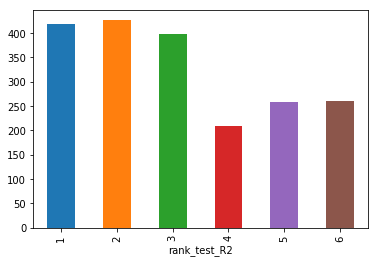

In [20]:
top10.mean_fit_time.plot.bar()

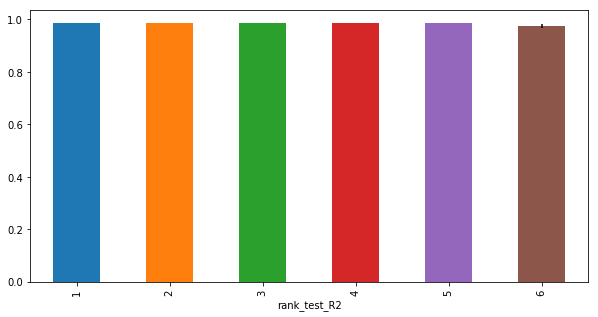

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
top10.mean_test_R2.plot.bar(yerr=top10.std_test_R2)

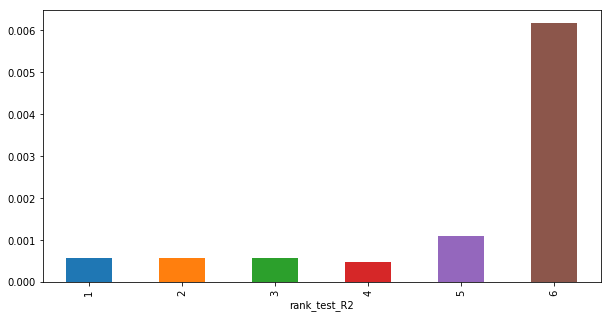

In [22]:
plt.figure(figsize=(10,5))
top10.std_test_R2.plot.bar()

In [23]:
top10.sort_values(['rank_test_R2'])

,param_learning_rate,param_max_iter,param_loss,param_eta0,param_penalty,rank_test_-MSE,rank_test_-MAE,std_test_-MSE,std_test_-MAE,std_test_R2,mean_test_-MSE,mean_test_-MAE,mean_test_R2,mean_fit_time
rank_test_R2,,,,,,,,,,,,,,
1,invscaling,100000,squared_loss,0.05,None,1,1,0.000483,0.001480,0.000550,-0.013347,-0.091036,0.986287,419.791378
2,invscaling,100000,squared_loss,0.1,None,2,2,0.000491,0.001504,0.000558,-0.013357,-0.091042,0.986276,426.281453
3,invscaling,100000,squared_loss,0.01,None,3,3,0.000495,0.001434,0.000563,-0.013536,-0.091617,0.986093,397.558125
4,constant,100000,squared_loss,0.01,None,4,4,0.000407,0.001359,0.000468,-0.013584,-0.091974,0.986044,209.449511
5,constant,100000,squared_loss,0.05,None,5,5,0.001060,0.003164,0.001077,-0.014770,-0.095160,0.984828,257.370240
6,constant,100000,squared_loss,0.1,None,6,6,0.006079,0.015979,0.006186,-0.025165,-0.124897,0.974170,260.817710


In [24]:
top10.sort_values(['rank_test_-MAE'])

,param_learning_rate,param_max_iter,param_loss,param_eta0,param_penalty,rank_test_-MSE,rank_test_-MAE,std_test_-MSE,std_test_-MAE,std_test_R2,mean_test_-MSE,mean_test_-MAE,mean_test_R2,mean_fit_time
rank_test_R2,,,,,,,,,,,,,,
1,invscaling,100000,squared_loss,0.05,None,1,1,0.000483,0.001480,0.000550,-0.013347,-0.091036,0.986287,419.791378
2,invscaling,100000,squared_loss,0.1,None,2,2,0.000491,0.001504,0.000558,-0.013357,-0.091042,0.986276,426.281453
3,invscaling,100000,squared_loss,0.01,None,3,3,0.000495,0.001434,0.000563,-0.013536,-0.091617,0.986093,397.558125
4,constant,100000,squared_loss,0.01,None,4,4,0.000407,0.001359,0.000468,-0.013584,-0.091974,0.986044,209.449511
5,constant,100000,squared_loss,0.05,None,5,5,0.001060,0.003164,0.001077,-0.014770,-0.095160,0.984828,257.370240
6,constant,100000,squared_loss,0.1,None,6,6,0.006079,0.015979,0.006186,-0.025165,-0.124897,0.974170,260.817710


In [25]:
top10.sort_values(['rank_test_-MSE'])

,param_learning_rate,param_max_iter,param_loss,param_eta0,param_penalty,rank_test_-MSE,rank_test_-MAE,std_test_-MSE,std_test_-MAE,std_test_R2,mean_test_-MSE,mean_test_-MAE,mean_test_R2,mean_fit_time
rank_test_R2,,,,,,,,,,,,,,
1,invscaling,100000,squared_loss,0.05,None,1,1,0.000483,0.001480,0.000550,-0.013347,-0.091036,0.986287,419.791378
2,invscaling,100000,squared_loss,0.1,None,2,2,0.000491,0.001504,0.000558,-0.013357,-0.091042,0.986276,426.281453
3,invscaling,100000,squared_loss,0.01,None,3,3,0.000495,0.001434,0.000563,-0.013536,-0.091617,0.986093,397.558125
4,constant,100000,squared_loss,0.01,None,4,4,0.000407,0.001359,0.000468,-0.013584,-0.091974,0.986044,209.449511
5,constant,100000,squared_loss,0.05,None,5,5,0.001060,0.003164,0.001077,-0.014770,-0.095160,0.984828,257.370240
6,constant,100000,squared_loss,0.1,None,6,6,0.006079,0.015979,0.006186,-0.025165,-0.124897,0.974170,260.817710


## Best parameters found 

In [26]:
regr.best_params_

{'eta0': 0.05,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 100000,
 'penalty': None}